In [1]:
#define functions for string process
def is_valid(sequence):
    for i in range(len(sequence)):
        if i % 4 == 1 and sequence[i] not in ["A", "T", "G", "C", "U"]:
            return False
        if i % 4 == 2 and sequence[i] not in ["r", "d", "m"]:
            return False
        if i % 4 == 3 and sequence[i] not in ["o", "s"]:
            return False
    return True

def length_of_sequence(sequence):
    if not is_valid(sequence):
        return -1
    return len(sequence) // 4 + 1 

def get_product_type(sequence):
    if not is_valid(sequence):
        return -1
    myset = set()
    for i in range(2, len(sequence), 4):
        myset.add(sequence[i])
        if sequence[i] == 'm':
            if i + 1 < len(sequence) and sequence[i + 1] != 's':
                return -1
    if len(myset) == 1 and list(myset)[0] == 'r':
        return "vanilla RNA"
    if len(myset) == 2:
        if 'd' in myset and 'r' in myset:
            return "chimera"
        if 'm' in myset and 'r' in myset:
            return "mod RNA"
    return -1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
data = pd.read_csv("synthesis_data.csv")

In [4]:
data.head()

,four_letter_sequence,synthesis_id,n-1,n+1,pure_yield,full_length_product,other_impurity,synthesis_duration,postprocessing_duration
0,-Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-G...,1,4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761
1,-Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-G...,1,8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761
2,-Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-A...,1,5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761
3,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761
4,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761


In [5]:
print("the shape of data:{}".format(data.shape))
print(data.isnull().sum())

the shape of data:(160, 9)
four_letter_sequence        0
synthesis_id                0
n-1                        34
n+1                        34
pure_yield                 16
full_length_product        32
other_impurity             32
synthesis_duration          0
postprocessing_duration     0
dtype: int64


In [6]:
#a. Use the functions from part 1 to create new columns for product type and length (if you were unable to
#complete some parts of problem 1, just do what you can.)
data["product_type"] = data["four_letter_sequence"].apply(get_product_type)
data["length"] = data["four_letter_sequence"].apply(length_of_sequence)

In [7]:
data["product_type"].value_counts()

mod RNA        64
chimera        48
vanilla RNA    48
Name: product_type, dtype: int64

In [8]:
data["length"].value_counts()

100    112
36      48
Name: length, dtype: int64

In [9]:
#b. What seems to be affecting the pure yield? What other variables seem to be related to the pure yield (e.g.,
#full length product, etc.)? Show any plots or descriptive statistics you use to explore this data and what
#strategies were needed to clean the data.

In [10]:
data.columns

Index(['four_letter_sequence', 'synthesis_id', 'n-1', 'n+1', 'pure_yield',
       'full_length_product', 'other_impurity', 'synthesis_duration',
       'postprocessing_duration', 'product_type', 'length'],
      dtype='object')

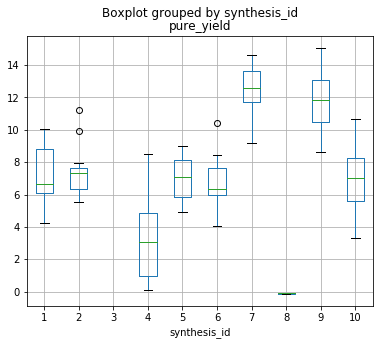

In [11]:
#synthesis_id on pure_yield
data.boxplot("pure_yield", by="synthesis_id", figsize=(6, 5));

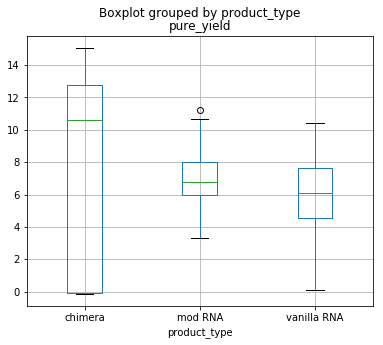

In [12]:
#product_type vs pure_yield
data.boxplot("pure_yield", by="product_type", figsize=(6, 5))

In [13]:
chimera = data[data["product_type"] == "chimera"]["pure_yield"].dropna()
mod = data[data["product_type"] == "mod RNA"]["pure_yield"].dropna()
vanilla = data[data["product_type"] == "vanilla RNA"]["pure_yield"].dropna()
t, p = ttest_ind(chimera, mod)
print("p-value between chimera and mod RNA:     {}".format(ttest_ind(chimera, mod)[1]))
print("p-value between chimera and vanilla RNA: {}".format(ttest_ind(chimera, vanilla)[1]))
print("p-value between mod and vanilla RNA:     {}".format(ttest_ind(mod, vanilla)[1]))

p-value between chimera and mod RNA:     0.31343459371374505
p-value between chimera and vanilla RNA: 0.01350432733221776
p-value between mod and vanilla RNA:     0.0016082556522800016


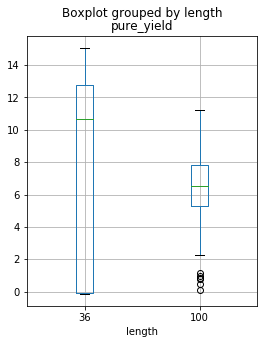

In [14]:
#length vs pure_yield
data.boxplot("pure_yield", by="length", figsize=(4, 5))

In [15]:
l_36 = data[data["length"] == 36]["pure_yield"].dropna()
l_100 = data[data["length"] == 100]["pure_yield"].dropna()
print("p-value:  {}".format(ttest_ind(l_36, l_100)[1]))

p-value:  0.019513975923238207


In [16]:
#visulize the correlations between other numerical values

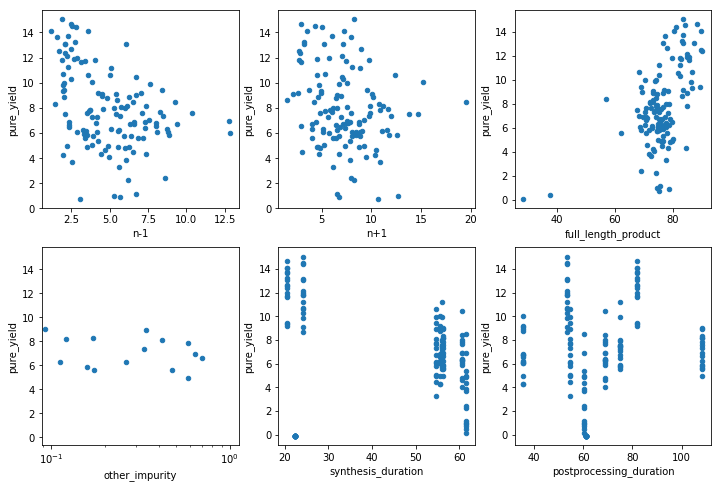

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
data.plot(x="n-1", y="pure_yield", kind="scatter", ax=axes[0, 0])
data.plot(x="n+1", y="pure_yield", kind="scatter", ax=axes[0, 1])
data.plot(x="full_length_product", y="pure_yield", kind="scatter", ax=axes[0, 2])
data.plot(x="other_impurity", y="pure_yield", kind="scatter", ax=axes[1, 0], logx=True)
data.plot(x="synthesis_duration", y="pure_yield", kind="scatter", ax=axes[1, 1])
data.plot(x="postprocessing_duration", y="pure_yield", kind="scatter", ax=axes[1, 2])

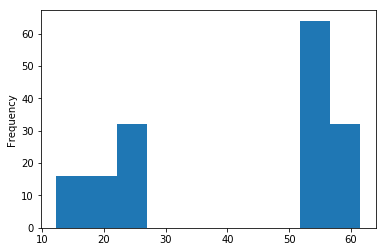

In [18]:
#distribution of synthesis_duration time
data["synthesis_duration"].plot.hist()

In [19]:
synthesis_short = data[data["synthesis_duration"] < 40]["pure_yield"].dropna()
synthesis_long = data[data["synthesis_duration"] > 40]["pure_yield"].dropna()
print("p-value:  {}".format(ttest_ind(synthesis_short, synthesis_long)[1]))

p-value:  0.019513975923238207


In [20]:
# Take home messages:
# synthesis_id is important for pure_yield, some ids have higher pure yield
# product_types are also correlated with pure_yield
# length is also correlated with pure_yield
# synthesis_duration is also important for pure_yield, short duration time leads to high pure yield.

In [21]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators import H2ORandomForestEstimator

In [22]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /home/sheldon/anaconda3/h2o_jar/h2o.jar
  Ice root: /tmp/tmp3n27z7ck
  JVM stdout: /tmp/tmp3n27z7ck/h2o_sheldon_started_from_python.out
  JVM stderr: /tmp/tmp3n27z7ck/h2o_sheldon_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,8 months and 22 days !!!
H2O cluster name:,H2O_from_python_sheldon_2cru8t
H2O cluster total nodes:,1
H2O cluster free memory:,3.455 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [23]:
data.columns

Index(['four_letter_sequence', 'synthesis_id', 'n-1', 'n+1', 'pure_yield',
       'full_length_product', 'other_impurity', 'synthesis_duration',
       'postprocessing_duration', 'product_type', 'length'],
      dtype='object')

In [24]:
h2o_data = H2OFrame(data)

/home/sheldon/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
h2o_data["synthesis_id"] = h2o_data["synthesis_id"].asfactor()
#h2o_data["synthesis_duration"] = (h2o_data["synthesis_duration"] < 40).asfactor()
#h2o_data["length"] = (h2o_data["length"] == 36).asfactor()

In [26]:
h2o_data.summary()

,four_letter_sequence,synthesis_id,n-1,n+1,pure_yield,full_length_product,other_impurity,synthesis_duration,postprocessing_duration,product_type,length
type,enum,enum,real,real,real,real,real,real,real,enum,int
mins,,,1.1656927380849775,1.5110867042344756,-0.11742580164803045,28.57795306407977,0.0,12.239413,0.0131435,,36.0
mean,,,4.870790326398085,7.275583693427041,6.9115012299942915,76.12434446323078,0.05298092176279329,42.41193445666353,59.891161126015845,,80.80000000000001
maxs,,,12.825024838253494,19.54017285264413,15.046220954862296,90.26048345517592,0.6992047443893575,61.546239446073656,108.42159720976424,,100.0
sigma,,,2.396764845736352,3.0013166242824543,3.9765758567692693,7.897568395670132,0.1288376102226953,18.847793003782325,27.247650344080927,,29.42056782797971
zeros,,,0,0,0,0,60,0,0,,0
missing,0,0,34,34,16,32,32,0,0,0,0
0,-Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-Gro-Cro-Aro-Uro-Cro-Gro-Gro-Cro-Uro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um,1,4.797640248115722,6.38192879999897,8.795529263072389,74.55368478865601,0.021143241089251277,55.65436943859153,35.75576136234773,mod RNA,100.0
1,-Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-Gro-Aro-Aro-Gro-Aro-Gro-Gro-Aro-Aro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um,1,8.056742643533934,8.434806962390747,6.089591814019787,74.96352511216574,0.053351872084340515,55.65436943859153,35.75576136234773,mod RNA,100.0
2,-Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-Aro-Aro-Gro-Gro-Uro-Cro-Aro-Cro-Uro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um,1,5.376105268294187,10.04219383680772,9.068502490996169,73.16919310915749,0.0,55.65436943859153,35.75576136234773,mod RNA,100.0


In [27]:
training_columns = h2o_data.columns
training_columns.remove("four_letter_sequence")
training_columns.remove("pure_yield")
response_column = "pure_yield"

In [28]:
# Define model
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=3)

# Train model
model.train(x=training_columns, y=response_column, training_frame=h2o_data)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
performance = model.model_performance(test_data=h2o_data)
print (performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.5383797711203483
RMSE: 0.7337436685385083
MAE: 0.5613588492955182
RMSLE: 0.12298945006663659
Mean Residual Deviance: 0.5383797711203483



              variable  relative_importance  scaled_importance  percentage
0         synthesis_id         70582.484375           1.000000    0.289817
1  full_length_product         58895.402344           0.834420    0.241829
2                  n+1         39763.132812           0.563357    0.163271
3                  n-1         23587.734375           0.334187    0.096853
4   synthesis_duration         13922.513672           0.197252    0.057167


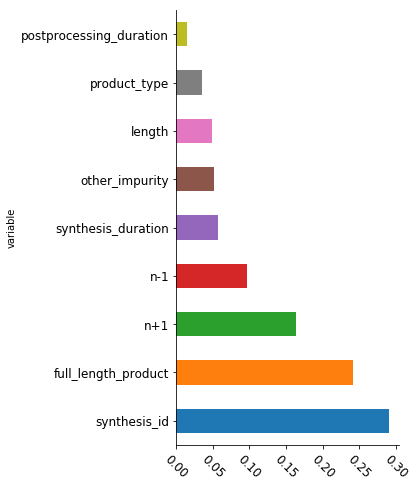

In [30]:
#get feature importance from model
feature_importance = model.varimp(use_pandas=True)
print(feature_importance.head())

feature_importance.plot.barh(x="variable", y="percentage", figsize=(4, 8), legend=False)
sns.despine()
plt.xticks(size=12, rotation=-45)
plt.yticks(size=12);